In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import  metrics
from sklearn import preprocessing
import matplotlib.font_manager
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.combine import SMOTETomek
from sklearn.metrics import recall_score

In [2]:
src='C:/Users/zinaw/Google Drive/Q4_2017/Q4_Cyber/cyber_lab1/data/after_normalization.csv'
df=pd.read_csv(src)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(df, df['label'], test_size = 0.3)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train,Y_train,
        test_size = 0.5,train_size =0.5)

In [10]:
from sklearn.model_selection import cross_val_score
number_neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
cv_scores = []

# perform 10-fold cross validation
for k in number_neighbors:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_validation, Y_validation, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


The optimal number of neighbors is 2


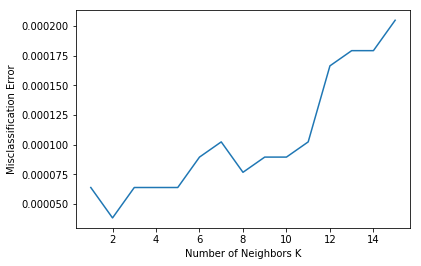

In [15]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
import matplotlib.pyplot as plt

# determining best k
optimal_k = number_neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(number_neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [4]:
sm = SMOTETomek()
# sm=SMOTE(random_state=20)
data_train_smote,label_train_smote=sm.fit_sample(X_train,Y_train)
print(Counter(label_train_smote))
print(Counter(Y_test))

Counter({0.0: 77990, 1.0: 77990})
Counter({0.0: 66840, 1.0: 112})


--------before smote----------
before smote recall: 0.9910714285714286
number of FP:
Counter({0.0: 66951, -1.0: 1})
number of FN:
Counter({0.0: 66951, -1.0: 1})
0.9910714285714286 0.0
--------after smote----------
after smote recall: 1.0
number of FP:
Counter({0.0: 66951, 1.0: 1})
number of FN:
Counter({0.0: 66951, 1.0: 1})
1.0 1.4961101137043686e-05


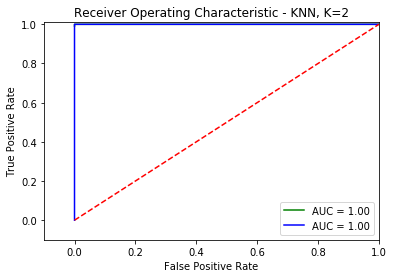

In [5]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
predict_label = knn.predict(X_test)
probability_predict1=knn.predict_proba(X_test)
#print(probability_predict[100:150])
fpr1,tpr1,thresholds1=metrics.roc_curve(Y_test,probability_predict1[:,1])
roc_auc1 = metrics.auc(fpr1, tpr1)
print('--------before smote----------')
print('before smote recall:',recall_score(Y_test, predict_label))
print('number of FP:')
print(Counter(predict_label-Y_test))
print('number of FN:')
print(Counter(predict_label-Y_test))

number_TP = 0
number_TN = 0
number_FP = 0
number_FN = 0
for i in range(len(predict_label)):
    if predict_label[i]==1 and Y_test.values[i] ==1:
        number_TP +=1
    if predict_label[i]==0 and Y_test.values[i] ==1:
        number_FN +=1    
    if predict_label[i]==0 and Y_test.values[i] ==0:
        number_TN +=1
    if predict_label[i]==1 and Y_test.values[i]==0:
        number_FP +=1
recall = number_TP/(number_TP+number_FN)
FPR = number_FP/(number_FP+number_TN)
print(recall, FPR)

knn.fit(data_train_smote,label_train_smote)
predict_label = knn.predict(X_test)
probability_predict=knn.predict_proba(X_test)
#print(probability_predict[100:150])
fpr,tpr,thresholds=metrics.roc_curve(Y_test,probability_predict[:,1])
roc_auc = metrics.auc(fpr, tpr)

print('--------after smote----------')
print('after smote recall:',recall_score(Y_test, predict_label))
print('number of FP:')
print(Counter(predict_label-Y_test))
print('number of FN:')
print(Counter(predict_label-Y_test))

number_TP = 0
number_TN = 0
number_FP = 0
number_FN = 0
for i in range(len(predict_label)):
    if predict_label[i]==1 and Y_test.values[i] ==1:
        number_TP +=1
    if predict_label[i]==0 and Y_test.values[i] ==1:
        number_FN +=1    
    if predict_label[i]==0 and Y_test.values[i] ==0:
        number_TN +=1
    if predict_label[i]==1 and Y_test.values[i]==0:
        number_FP +=1
recall = number_TP/(number_TP+number_FN)
FPR = number_FP/(number_FP+number_TN)
print(recall, FPR)

plt.title('Receiver Operating Characteristic - %s' % 'KNN, K=2')

plt.plot(fpr1, tpr1, 'g', label='AUC = %0.2f' % roc_auc1)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [6]:
df['amount_2'] = df['euro_amount']**2
df['amount_3'] = df['euro_amount']**3

In [7]:
df = (df - df.min()) / (df.max() - df.min())
# print(df)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(df, df['label'], test_size = 0.3)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train,Y_train,
        test_size = 0.5,train_size =0.5)
del X_train['label']
del X_test['label']
del X_validation['label']

In [ ]:
number_neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
cv_scores = []
from sklearn.model_selection import cross_val_score
# perform 10-fold cross validation
for k in number_neighbors:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_validation, Y_validation, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

1


The optimal number of neighbors is 2


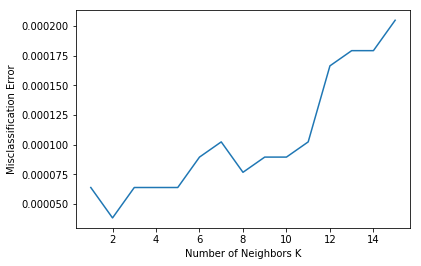

In [31]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
import matplotlib.pyplot as plt

# determining best k
optimal_k = number_neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(number_neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
sm = SMOTETomek()
# sm=SMOTE(random_state=20)
data_train_smote,label_train_smote=sm.fit_sample(X_train,Y_train)
print(Counter(label_train_smote))
print(Counter(Y_test))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
predict_label = knn.predict(X_test)
probability_predict1=knn.predict_proba(X_test)
#print(probability_predict[100:150])
fpr1,tpr1,thresholds1=metrics.roc_curve(Y_test,probability_predict1[:,1])
roc_auc1 = metrics.auc(fpr1, tpr1)
print('--------before smote----------')
print('before smote recall:',recall_score(Y_test, predict_label))
print('number of FP:')
print(Counter(predict_label-Y_test))
print('number of FN:')
print(Counter(predict_label-Y_test))

number_TP = 0
number_TN = 0
number_FP = 0
number_FN = 0
for i in range(len(predict_label)):
    if predict_label[i]==1 and Y_test.values[i] ==1:
        number_TP +=1
    if predict_label[i]==0 and Y_test.values[i] ==1:
        number_FN +=1    
    if predict_label[i]==0 and Y_test.values[i] ==0:
        number_TN +=1
    if predict_label[i]==1 and Y_test.values[i]==0:
        number_FP +=1
recall = number_TP/(number_TP+number_FN)
FPR = number_FP/(number_FP+number_TN)
print(recall, FPR)

knn.fit(data_train_smote,label_train_smote)
predict_label = knn.predict(X_test)
probability_predict=knn.predict_proba(X_test)
#print(probability_predict[100:150])
fpr,tpr,thresholds=metrics.roc_curve(Y_test,probability_predict[:,1])
roc_auc = metrics.auc(fpr, tpr)

print('--------after smote----------')
print('after smote recall:',recall_score(Y_test, predict_label))
print('number of FP:')
print(Counter(predict_label-Y_test))
print('number of FN:')
print(Counter(predict_label-Y_test))

number_TP = 0
number_TN = 0
number_FP = 0
number_FN = 0
for i in range(len(predict_label)):
    if predict_label[i]==1 and Y_test.values[i] ==1:
        number_TP +=1
    if predict_label[i]==0 and Y_test.values[i] ==1:
        number_FN +=1    
    if predict_label[i]==0 and Y_test.values[i] ==0:
        number_TN +=1
    if predict_label[i]==1 and Y_test.values[i]==0:
        number_FP +=1
recall = number_TP/(number_TP+number_FN)
FPR = number_FP/(number_FP+number_TN)
print(recall, FPR)

plt.title('Receiver Operating Characteristic - %s' % 'KNN, K=2')

plt.plot(fpr1, tpr1, 'g', label='AUC = %0.2f' % roc_auc1)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()